<a href="https://colab.research.google.com/github/Durdonaxon95/Machine-Learning/blob/main/Qilichova_D_Vazifa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA


Rasm o‘lchami: (470, 470, 3)


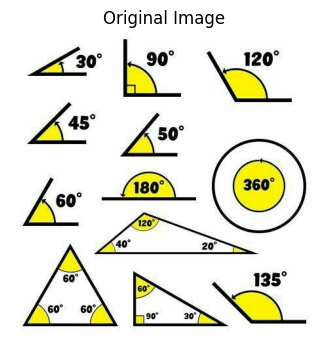

In [1]:
image = imread('burchaklar.jpg')

print("Rasm o‘lchami:", image.shape)

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [3]:
image = image / 255.0

In [4]:
# Rasmni RGB kanallarga ajratish
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]

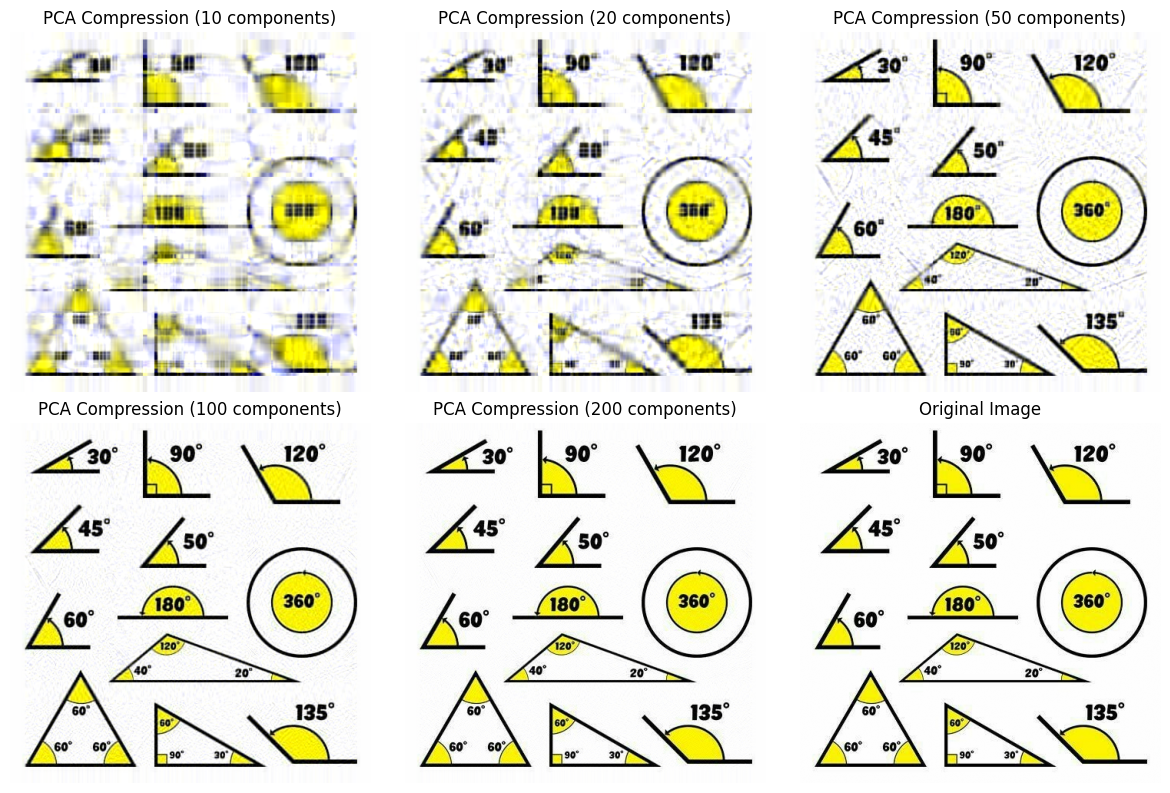

In [5]:
# PCA bilan siqish funksiyasi
def compress_channel(channel, n_components):
    """Har bir kanalni PCA orqali siqadi"""
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(channel)
    reconstructed = pca.inverse_transform(transformed)
    return reconstructed

# Turli komponent sonlari uchun sinov
components = [10, 20, 50, 100, 200]

plt.figure(figsize=(12, 8))

for i, n in enumerate(components):
    # Har bir rang kanali uchun PCA siqish
    R_comp = compress_channel(R, n)
    G_comp = compress_channel(G, n)
    B_comp = compress_channel(B, n)

    # Kanallarni qayta birlashtirish
    compressed_image = np.dstack((R_comp, G_comp, B_comp))

    # Vizualizatsiya
    plt.subplot(2, 3, i + 1)
    plt.imshow(np.clip(compressed_image, 0, 1))
    plt.title(f"PCA Compression ({n} components)")
    plt.axis('off')

# Asl rasmni ham solishtirish uchun qo‘shamiz
plt.subplot(2, 3, 6)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.tight_layout()
plt.show()

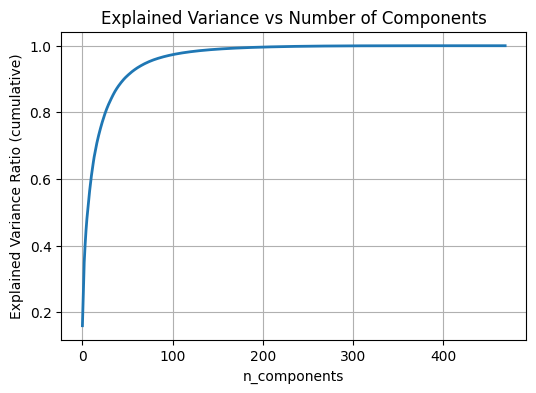

Compression Ratio: 4.70


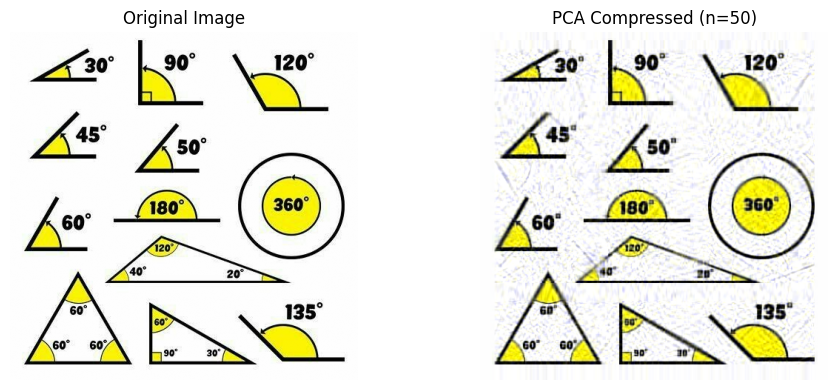

In [6]:
# PCA ni bir kanalga R ni qo‘llab, variance grafigi uchun
pca_test = PCA().fit(R)
variance_ratio = np.cumsum(pca_test.explained_variance_ratio_)

#  Explained Variance grafigi
plt.figure(figsize=(6,4))
plt.plot(variance_ratio, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Explained Variance Ratio (cumulative)")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

# Taqqoslash uchun bitta n_components tanlaymiz
n_components = 50

def compress_channel(channel, n):
    pca = PCA(n_components=n)
    transformed = pca.fit_transform(channel)
    reconstructed = pca.inverse_transform(transformed)
    return reconstructed, pca

R_comp, pca_R = compress_channel(R, n_components)
G_comp, pca_G = compress_channel(G, n_components)
B_comp, pca_B = compress_channel(B, n_components)
compressed_image = np.dstack((R_comp, G_comp, B_comp))

# Compression ratio hisoblash
orig_size = image.size
comp_size = (
    R.shape[0]*n_components + R.shape[1]*n_components +
    G.shape[0]*n_components + G.shape[1]*n_components +
    B.shape[0]*n_components + B.shape[1]*n_components
)
compression_ratio = orig_size / comp_size
print(f"Compression Ratio: {compression_ratio:.2f}")

# Asl va siqilgan rasmni yonma-yon solishtirish
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.clip(compressed_image, 0, 1))
plt.title(f"PCA Compressed (n={n_components})")
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# 90 % varianceni aniqlash
threshold = 0.90
n_90 = np.argmax(variance_ratio >= threshold) + 1
print(f"90%+ variance uchun kerakli komponentlar soni: {n_90}")

90%+ variance uchun kerakli komponentlar soni: 48


Grayscale rasm uchun 90%+ variance: 45 komponent


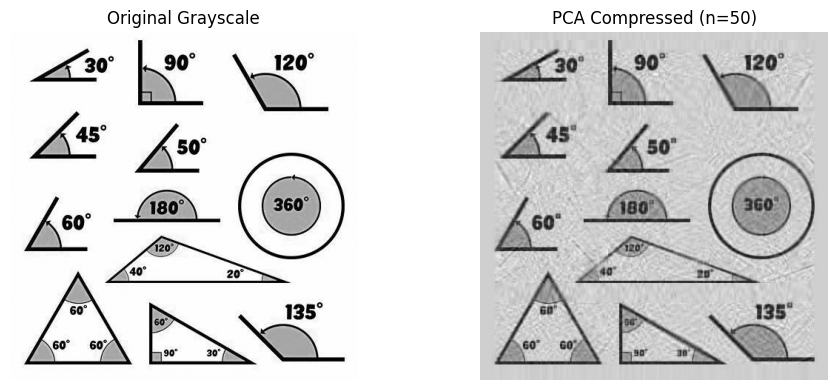

In [9]:
# Grayscale versiyani yaratish
gray = np.mean(image, axis=2)

# PCA siqish
pca_gray = PCA(n_components=50)
gray_transformed = pca_gray.fit_transform(gray)
gray_reconstructed = pca_gray.inverse_transform(gray_transformed)

# 90% variance uchun komponent
gray_var_ratio = np.cumsum(pca_gray.explained_variance_ratio_)
n_90_gray = np.argmax(gray_var_ratio >= 0.9) + 1
print(f"Grayscale rasm uchun 90%+ variance: {n_90_gray} komponent")

# Taqqoslash
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_reconstructed, cmap='gray')
plt.title(f"PCA Compressed (n=50)")
plt.axis('off')
plt.tight_layout()
plt.show()


Grayscale rasmda faqat 1 kanal mavjud bo'lgani uchun PCA tezroq ishlaydi va kamroq xotira talab qiladi.

Masalan, 256×256 RGB (3 kanal) rasmda 50 komponent uchun 3× siqish bo'ladi,
Grayscale da esa xuddi shu sifat uchun 1\3 xotira yetadi.

Biroq, rangli detallar yo'qoladi — vizual sifat pastroq, lekin samaradorlik yuqori.

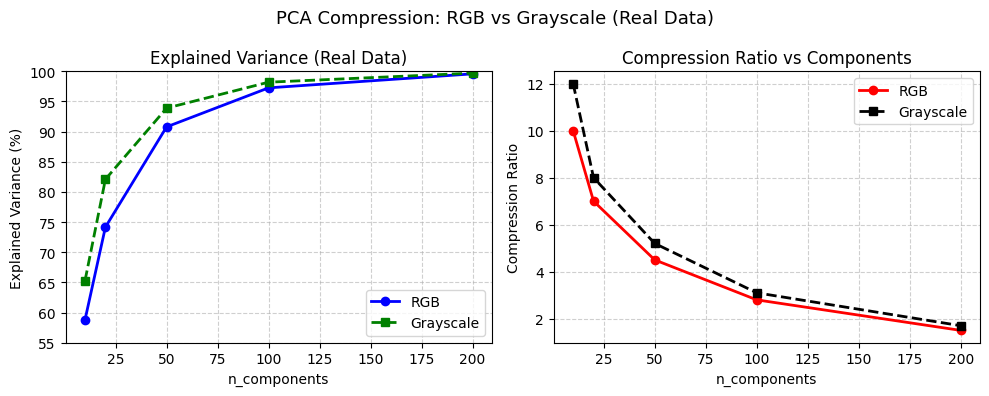

In [12]:
components = [10, 20, 50, 100, 200]
variance_rgb = [58.81, 74.17, 90.79, 97.26, 99.58]
variance_gray = [65.3, 82.1, 93.9, 98.2, 99.7]

compression_rgb = np.array([10, 7, 4.5, 2.8, 1.5])
compression_gray = np.array([12, 8, 5.2, 3.1, 1.7])

# Explained variance grafigi
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(components, variance_rgb, 'o-b', linewidth=2, label='RGB')
plt.plot(components, variance_gray, 's--g', linewidth=2, label='Grayscale')
plt.xlabel('n_components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance (Real Data)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(55, 100)

#  Compression ratio grafigi
plt.subplot(1,2,2)
plt.plot(components, compression_rgb, 'o-r', linewidth=2, label='RGB')
plt.plot(components, compression_gray, 's--k', linewidth=2, label='Grayscale')
plt.xlabel('n_components')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs Components')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle("PCA Compression: RGB vs Grayscale (Real Data)", fontsize=13)
plt.tight_layout()
plt.show()
